In [6]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# from pylab import rcParams
# rcParams['figure.figsize'] = 8, 5

# plt.style.use('ggplot')
# %config InlineBackend.figure_format = 'svg'

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pickle

In [1]:
import sys
sys.path

['/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/home/minaeva_oi/.ipython']

In [10]:
data = pd.read_csv("data/winequality-white.csv", sep=';')

In [11]:
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [12]:
data.shape

(4898, 12)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [14]:
data.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [17]:
data['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

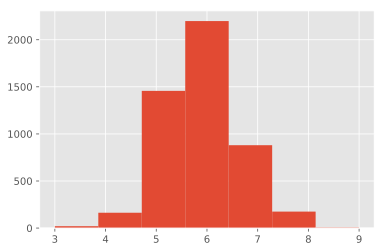

In [11]:
_ = plt.hist(data['quality'], bins=7)
plt.show()

#### Построим распределение признаков по классам

In [184]:
rcParams['figure.figsize'] = 8, 4

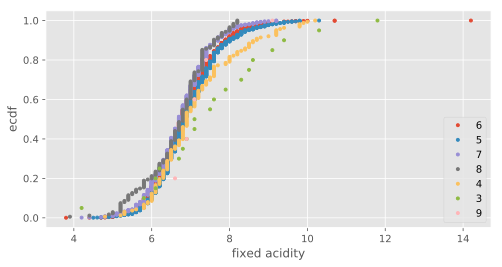

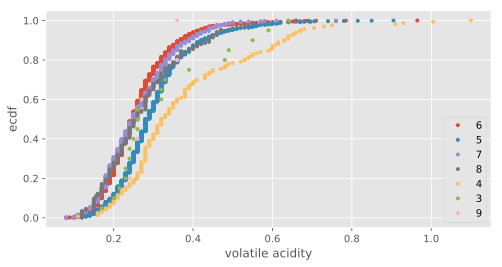

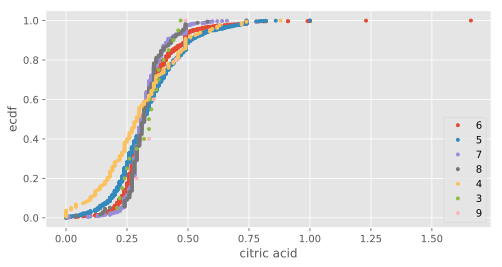

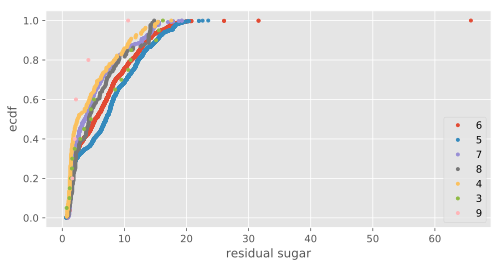

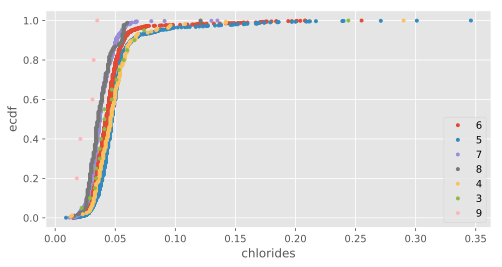

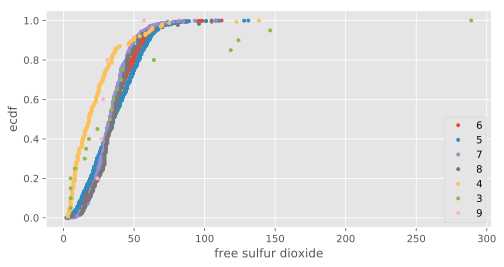

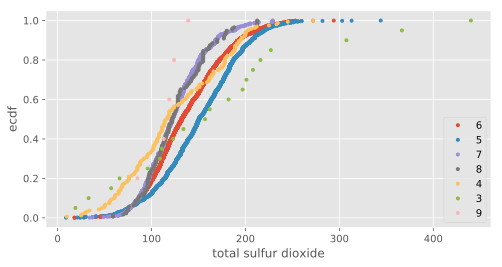

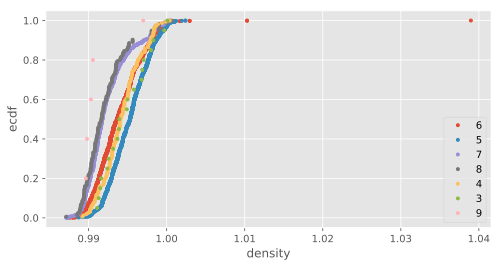

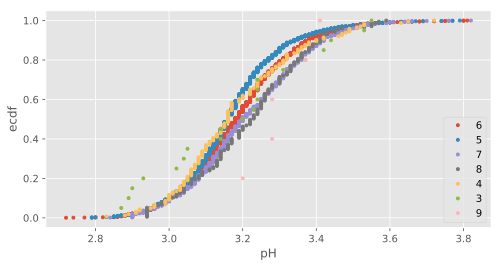

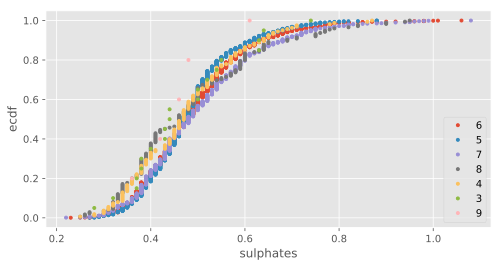

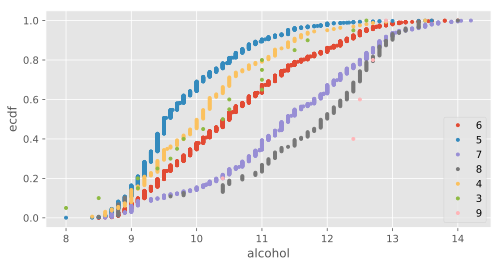

CPU times: user 28.9 s, sys: 1.01 s, total: 29.9 s
Wall time: 28.4 s


In [185]:
%%time

for feature in data.columns[:-1]:
    for quality_value in data['quality'].unique():
        x = np.sort(data[feature][data['quality'] == quality_value])
        y = np.arange(1, len(x) + 1) / len(x)
        _ = plt.plot(x, y, marker='.', linestyle='none')
        _ = plt.xlabel(feature)
        _ = plt.ylabel('ecdf')
    plt.legend(data['quality'].unique(), loc='lower right')
    plt.show()

In [16]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Логистическая регрессия

In [76]:
logreg = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
print("accuracy for train: %.3f" % accuracy_score(y_true=y_train, y_pred=logreg.predict(X_train_scaled)))
print("accuracy for 5-folds cv: %.3f" %np.mean(cross_val_score(logreg, X_train_scaled, y_train, 
                                                               cv = 5, scoring="accuracy")))
print("accuracy for test: %.3f" % accuracy_score(y_test, logreg.predict(X_test_scaled)))

accuracy for train: 0.548
accuracy for 5-folds cv: 0.537
accuracy for test: 0.539


In [137]:
print(classification_report(y_test, logreg.predict(X_test_scaled)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.03      0.05        40
           5       0.57      0.55      0.56       426
           6       0.53      0.74      0.62       668
           7       0.51      0.22      0.31       280
           8       0.00      0.00      0.00        49
           9       0.00      0.00      0.00         0

   micro avg       0.54      0.54      0.54      1470
   macro avg       0.30      0.22      0.22      1470
weighted avg       0.52      0.54      0.50      1470



##### Матрица ошибок для logreg

In [159]:
print(confusion_matrix(y_test, logreg.predict(X_test_scaled)))

[[  0   0   3   2   1   1   0]
 [  0   1  20  19   0   0   0]
 [  0   1 235 187   2   1   0]
 [  0   0 127 495  45   0   1]
 [  0   0  22 196  62   0   0]
 [  0   0   2  35  12   0   0]
 [  0   0   0   0   0   0   0]]


### SVM

In [19]:
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=42,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
print("accuracy for train: %.3f" % accuracy_score(y_true=y_train, y_pred=svc.predict(X_train_scaled)))
print("accuracy for 5-folds cv: %.3f" %np.mean(cross_val_score(svc, X_train_scaled, y_train, 
                                                               cv = 5, scoring="accuracy")))
print("accuracy for test: %.3f" % accuracy_score(y_test, svc.predict(X_test_scaled)))

accuracy for train: 0.620
accuracy for 5-folds cv: 0.564
accuracy for test: 0.565


In [21]:
print(classification_report(y_test, svc.predict(X_test_scaled)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.05      0.09        40
           5       0.61      0.60      0.60       426
           6       0.54      0.76      0.63       668
           7       0.59      0.23      0.33       280
           8       0.00      0.00      0.00        49

   micro avg       0.56      0.56      0.56      1470
   macro avg       0.37      0.27      0.28      1470
weighted avg       0.55      0.56      0.53      1470



In [22]:
filename = 'svm_model.pkl'
pickle.dump(svc, open(filename, 'wb'))

##### Результат чуть лучше, чем у логистической регрессии

### Случайный лес

In [182]:
rfc = RandomForestClassifier(n_estimators=200, random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [183]:
print("accuracy for train: %.3f" % accuracy_score(y_true=y_train, y_pred=rfc.predict(X_train_scaled)))
print("accuracy for 5-folds cv: %.3f" %np.mean(cross_val_score(rfc, X_train_scaled, y_train, 
                                                               cv = 5, scoring="accuracy")))
print("accuracy for test: %.3f" % accuracy_score(y_test, rfc.predict(X_test_scaled)))

accuracy for train: 1.000
accuracy for 5-folds cv: 0.654
accuracy for test: 0.682


In [168]:
print(classification_report(y_test, rfc.predict(X_test_scaled)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.44      0.10      0.16        40
           5       0.69      0.71      0.70       426
           6       0.66      0.79      0.72       668
           7       0.76      0.54      0.63       280
           8       0.78      0.37      0.50        49

   micro avg       0.68      0.68      0.68      1470
   macro avg       0.56      0.42      0.45      1470
weighted avg       0.68      0.68      0.67      1470



##### Случайный лес показывает лучшую точность и полноту на тесте по сравнению с регрессией и SVM

##### Подберем параметры для RF

In [165]:
rf_params = {'max_depth': list(range(10, 20)), 'min_samples_leaf': list(range(1, 5)),
             'max_features': list(range(2, 5))}

In [169]:
best_rf = GridSearchCV(RandomForestClassifier(n_estimators=200, random_state=42), rf_params, scoring='accuracy', cv=5, 
                       verbose=True, n_jobs=-1)
best_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 10.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_leaf': [1, 2, 3, 4], 'max_features': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=True)

In [170]:
best_rf.best_params_, best_rf.best_score_

({'max_depth': 18, 'max_features': 2, 'min_samples_leaf': 1},
 0.6546091015169195)

In [174]:
rfc2 = RandomForestClassifier(n_estimators=200, max_depth=18, max_features=2, min_samples_leaf=1, random_state=42)
rfc2.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=18, max_features=2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [175]:
print(confusion_matrix(y_test, rfc2.predict(X_test_scaled)))

[[  0   0   4   3   0   0]
 [  0   5  20  15   0   0]
 [  0   3 297 124   2   0]
 [  0   2 107 526  33   0]
 [  0   0   5 117 157   1]
 [  0   0   1  13  16  19]]


In [176]:
print(classification_report(y_test, rfc2.predict(X_test_scaled)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.50      0.12      0.20        40
           5       0.68      0.70      0.69       426
           6       0.66      0.79      0.72       668
           7       0.75      0.56      0.64       280
           8       0.95      0.39      0.55        49

   micro avg       0.68      0.68      0.68      1470
   macro avg       0.59      0.43      0.47      1470
weighted avg       0.69      0.68      0.67      1470



#### Точность и полнота на тесте - 0.69 и 0.68 соответственно - незначительные улучшения по сравнению с RF без настройки параметров

In [177]:
print("accuracy for train: %.3f" % accuracy_score(y_true=y_train, y_pred=rfc2.predict(X_train_scaled)))
print("accuracy for 5-folds cv: %.3f" %np.mean(cross_val_score(rfc2, X_train_scaled, y_train, 
                                                               cv = 5, scoring="accuracy")))
print("accuracy for test: %.3f" % accuracy_score(y_test, rfc2.predict(X_test_scaled)))

accuracy for train: 1.000
accuracy for 5-folds cv: 0.655
accuracy for test: 0.683


#### Посмотрим на рейтинг влияния признаков на качество вина в модели RF2

In [189]:
rf2_importance = pd.DataFrame(rfc2.feature_importances_, columns=['coef'],
                            index=data.columns[:-1]) 
rf2_importance.sort_values(by='coef', ascending=False)

coef
alcohol               0.113647
density               0.103318
volatile acidity      0.101227
total sulfur dioxide  0.092792
free sulfur dioxide   0.091035
residual sugar        0.088779
chlorides             0.086178
pH                    0.084708
citric acid           0.080182
sulphates             0.080147
fixed acidity         0.077986

#### Итого, главный признак в настроенной модели случайного леса - alcohol.

#### Сохраняем модель:

In [199]:
filename = 'rf_model.pkl'
pickle.dump(rfc2, open(filename, 'wb'))

In [200]:
loaded_model = pickle.load(open(filename, 'rb'))